Titanic Dataset Analysis
Dataset loaded from: titanic.csv

Overall Survival Rate: 38.38%


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x800 with 0 Axes>

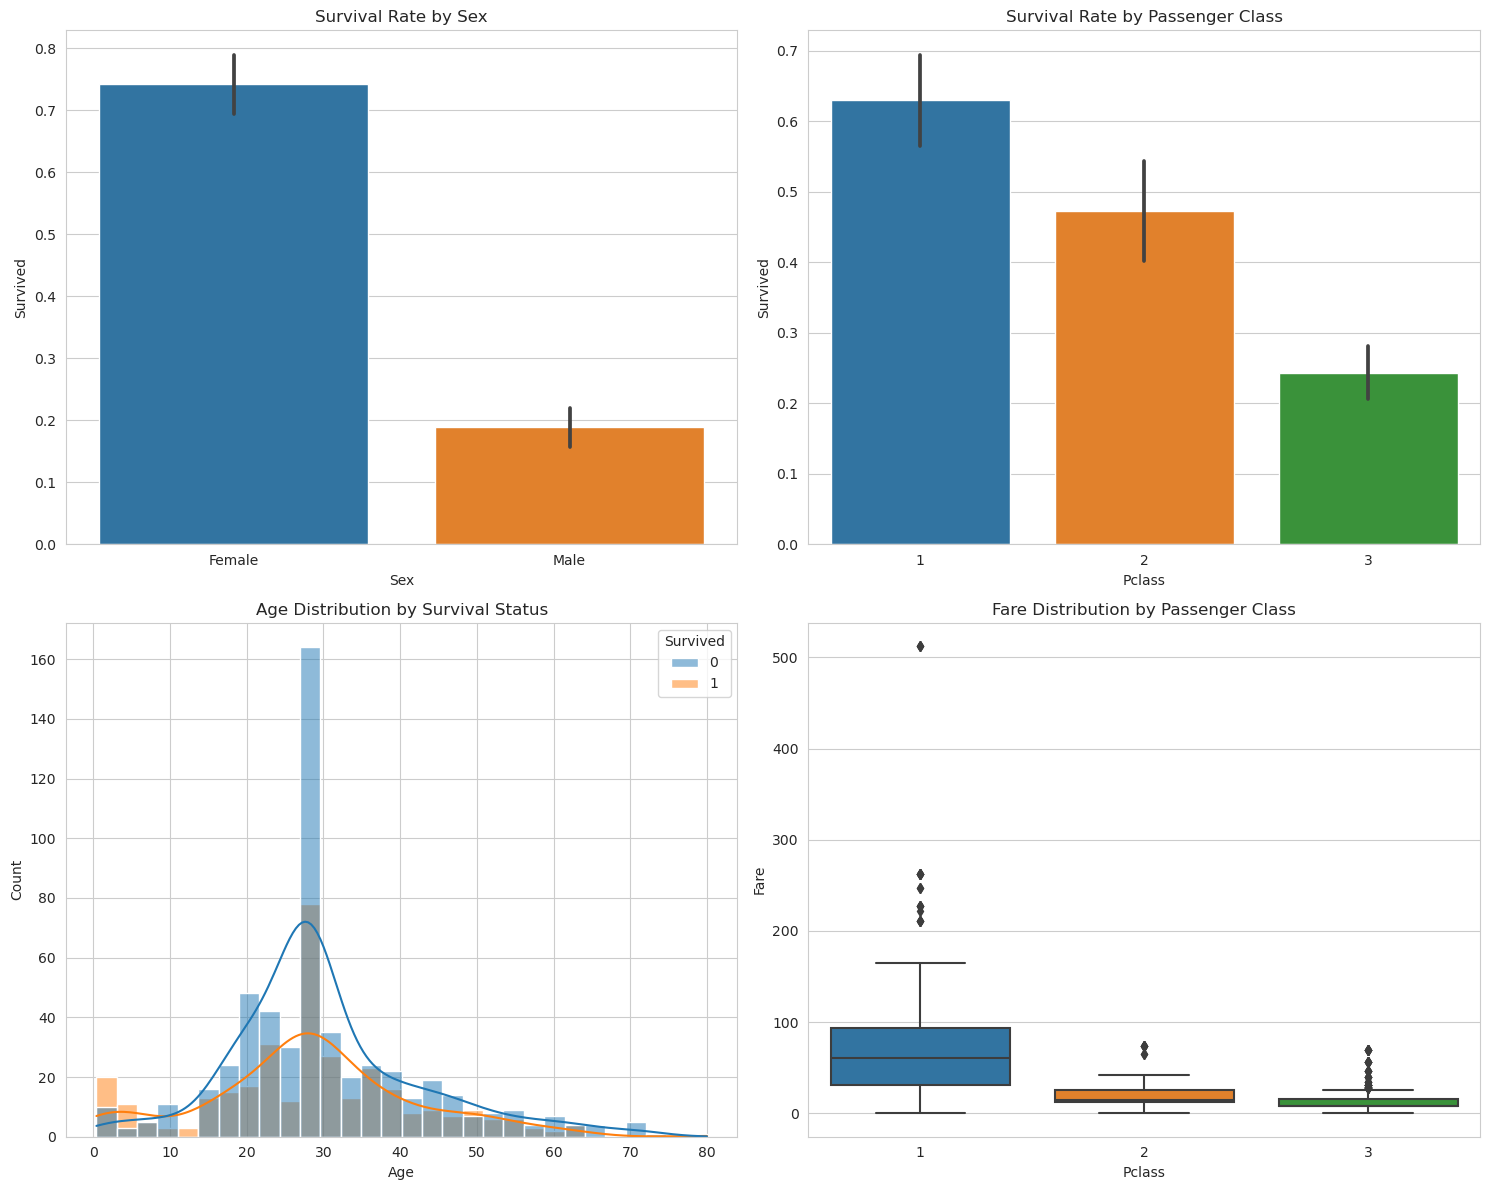

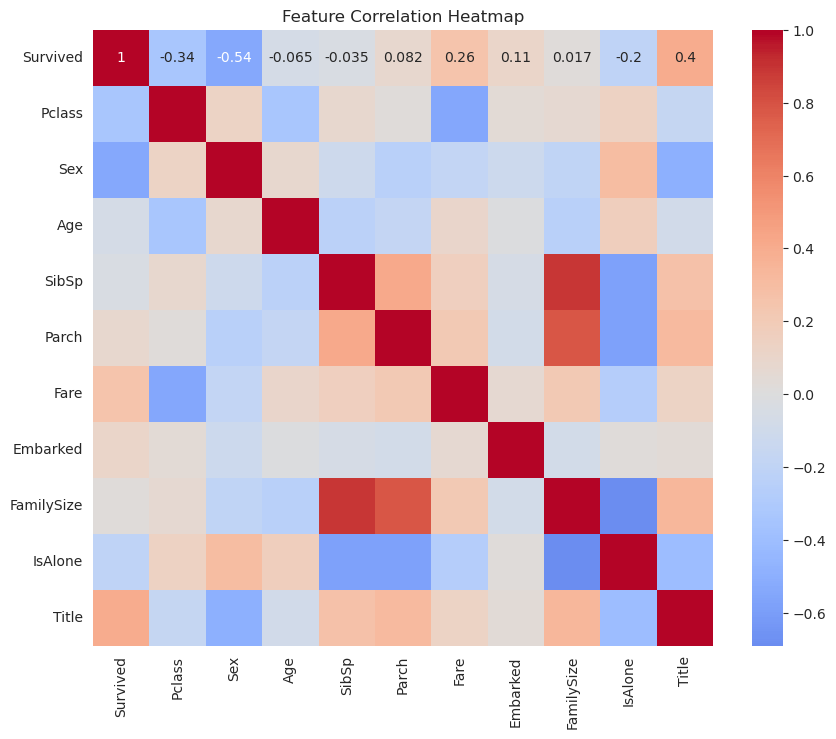


Analysis completed successfully!
Cleaned dataset saved as 'titanic_clean.csv'


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from urllib.request import urlretrieve

def load_titanic_data():
    """Load Titanic dataset with multiple fallback options"""
    local_paths = [
        'titanic.csv',
        'data/titanic.csv',
        'train.csv',
        '../input/titanic/train.csv'  
    ]
    download_url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
    
    for path in local_paths:
        if os.path.exists(path):
            try:
                df = pd.read_csv(path)
                print(f"Dataset loaded from: {path}")
                return df
            except Exception as e:
                print(f"Error reading {path}: {e}")
                continue
    
    try:
        print("Downloading dataset from Stanford University...")
        urlretrieve(download_url, 'titanic.csv')
        df = pd.read_csv('titanic.csv')
        print("Dataset downloaded successfully")
        return df
    except Exception as e:
        raise Exception(f"Failed to load dataset: {e}")

def clean_data(df):
    """Perform data cleaning and feature engineering"""
    
    df['Age'] = df['Age'].fillna(df['Age'].median())
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    df['Fare'] = df['Fare'].fillna(df['Fare'].median())
    
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
    df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
    
    df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    title_mapping = {
        'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4,
        'Dr': 5, 'Rev': 5, 'Col': 5, 'Major': 5,
        'Mlle': 2, 'Ms': 2, 'Lady': 5, 'Countess': 5,
        'Capt': 5, 'Sir': 5, 'Don': 5, 'Jonkheer': 5
    }
    df['Title'] = df['Title'].map(title_mapping).fillna(0)
    
    df['Sex'] = df['Sex'].map({'female': 0, 'male': 1}).astype(int)
    df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
    df.drop(['Cabin', 'Ticket', 'Name', 'PassengerId'], axis=1, inplace=True, errors='ignore')
    
    return df

def perform_eda(df):
    """Perform exploratory data analysis with visualizations"""
    # Set style
    sns.set_style('whitegrid')
    plt.figure(figsize=(12, 8))
    
    # 1. Survival Rate Overview
    survival_rate = df['Survived'].mean()
    print(f"\nOverall Survival Rate: {survival_rate:.2%}")
    
    # 2. Visualization: Survival by Features
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Survival by Sex
    sns.barplot(x='Sex', y='Survived', data=df, ax=axes[0, 0])
    axes[0, 0].set_title('Survival Rate by Sex')
    axes[0, 0].set_xticklabels(['Female', 'Male'])
    
    # Survival by Class
    sns.barplot(x='Pclass', y='Survived', data=df, ax=axes[0, 1])
    axes[0, 1].set_title('Survival Rate by Passenger Class')
    
    # Age Distribution
    sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, ax=axes[1, 0])
    axes[1, 0].set_title('Age Distribution by Survival Status')
    
    # Fare Distribution
    sns.boxplot(x='Pclass', y='Fare', data=df, ax=axes[1, 1])
    axes[1, 1].set_title('Fare Distribution by Passenger Class')
    
    plt.tight_layout()
    plt.show()
    
    # 3. Correlation Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Feature Correlation Heatmap')
    plt.show()

def main():
    """Main execution function"""
    print("Titanic Dataset Analysis")
    print("=" * 50)
    
    # Load data
    try:
        titanic = load_titanic_data()
        
        # Clean data
        titanic_clean = clean_data(titanic)
        
        # Perform EDA
        perform_eda(titanic_clean)
        
        #saving cleaned data
        titanic_clean.to_csv('titanic_clean.csv', index=False)
        print("\nAnalysis completed successfully!")
        print("Cleaned dataset saved as 'titanic_clean.csv'")
        
    except Exception as e:
        print(f"\nError occurred: {e}")
        print("Please check your file paths or internet connection.")

if __name__ == "__main__":
    main()